In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (4)\Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


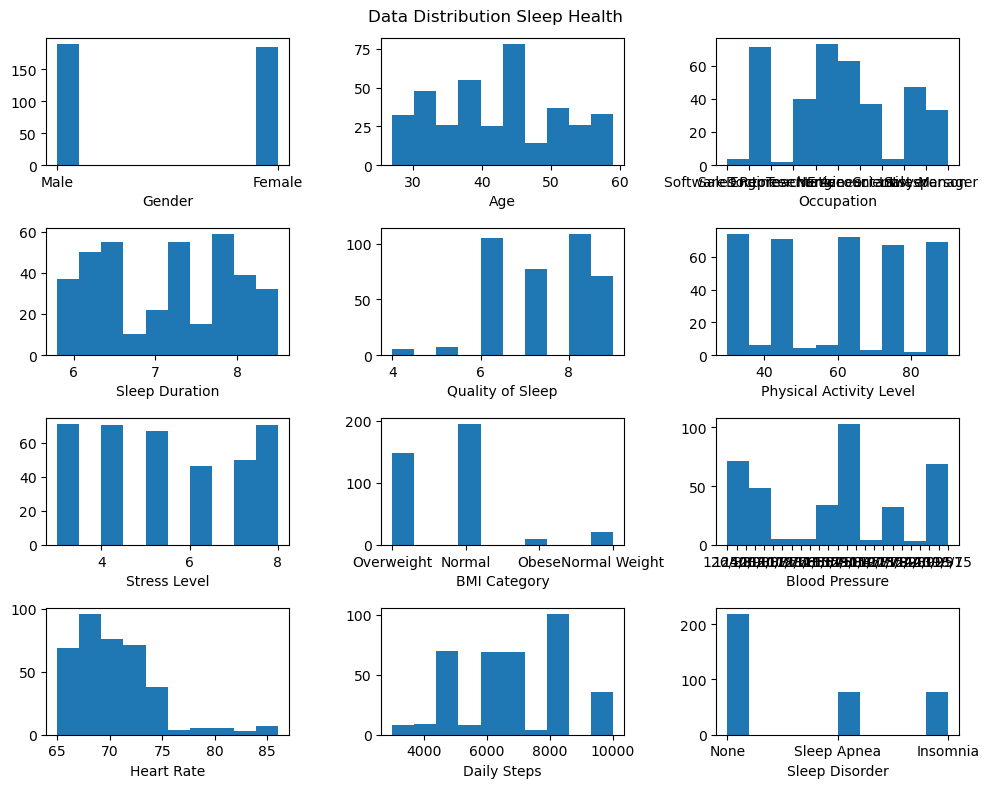

In [5]:


# Create the figure with 4 rows and 3 columns
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))

# Iterate over features and create histograms
v, h = 0, 0  # Track row and column indices
for feature in df.columns[1:]:
    ax[v, h].hist(df[feature])
    ax[v, h].set_xlabel(feature)
    h += 1
    if h == 3:  # Move to the next row after filling the current row
        h = 0
        v += 1

# Rotate x-axis labels for all subplots (important change)
  # Rotate 45 degrees counter-clockwise

# Add a suptitle
plt.suptitle("Data Distribution Sleep Health", fontweight=400, fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()



In [6]:
print(f"The minimum age is {min(df['Age'])} and the maximum age is {max(df['Age'])}.")
print(f"The median age is { np.median(df['Age']) }.")

The minimum age is 27 and the maximum age is 59.
The median age is 43.0.


Text(0, 0.5, 'Amount')

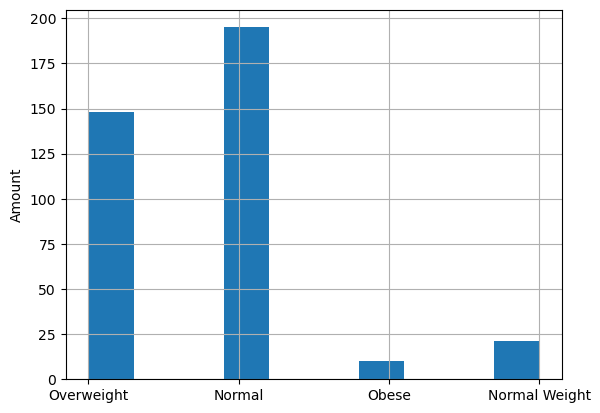

In [7]:
# As our BMI category histogram wasn't perfectly visible, we'll revisit it here
df["BMI Category"].hist();
plt.ylabel("Amount")

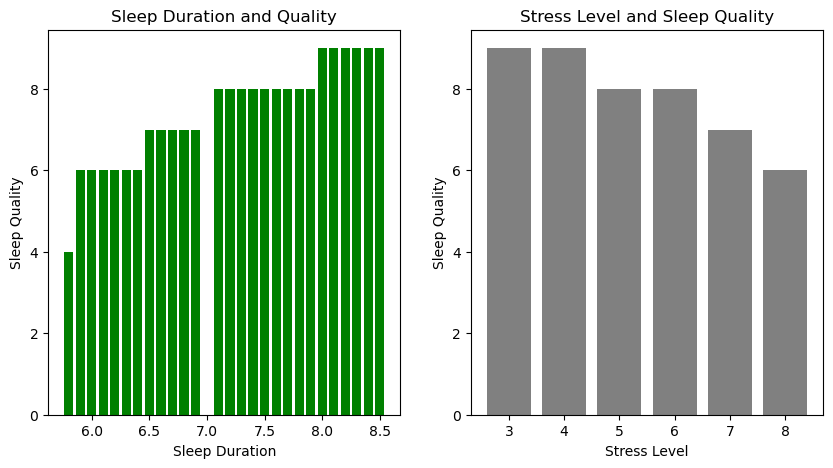

In [8]:
# Let's see if we can find some correlations here:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].bar(df["Sleep Duration"], df["Quality of Sleep"], color="green", width=[0.08])
ax[0].set_xlabel("Sleep Duration"), ax[0].set_ylabel("Sleep Quality")
ax[0].set_title("Sleep Duration and Quality")

ax[1].bar(df["Stress Level"], df["Quality of Sleep"], color="grey")
ax[1].set_xlabel("Stress Level"), ax[1].set_ylabel("Sleep Quality")
ax[1].set_title("Stress Level and Sleep Quality");

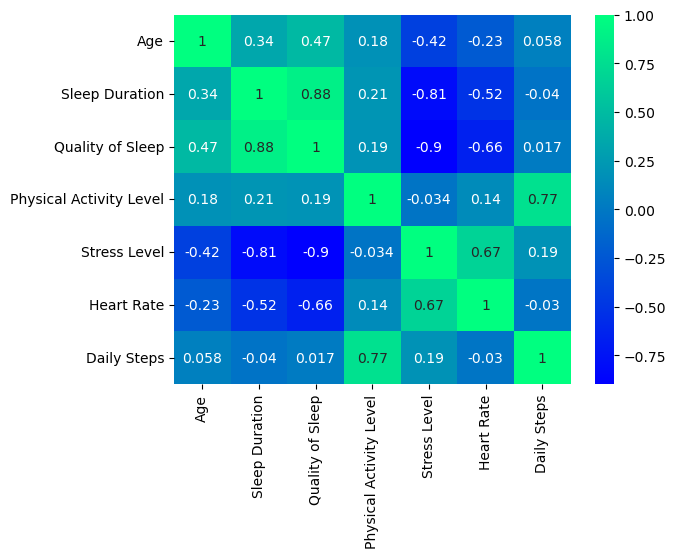

In [9]:
sns.heatmap(df.drop("Person ID", axis=1).corr(numeric_only=True),
            cmap="winter",
            annot=True);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
# Change objects into categorical numbers
from sklearn import preprocessing

# Columns we want to transform
categorical = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]

label_encoder = preprocessing.LabelEncoder()

for label in categorical:
    df[label] = label_encoder.fit_transform(df[label])

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,2
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,2


In [12]:

# Create new columns with extracted values
def extract_pressure(bp_value):
    if pd.isna(bp_value):  # Handle missing values (None)
        return None, None
    else:
        return bp_value.split('/')  # Split on '/' delimiter

df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].apply(extract_pressure).tolist()

# Print the modified DataFrame
print(df)


     Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1   27           9             6.1                 6   
1            2       1   28           1             6.2                 6   
2            3       1   28           1             6.2                 6   
3            4       1   28           6             5.9                 4   
4            5       1   28           6             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       0   59           5             8.1                 9   
370        371       0   59           5             8.0                 9   
371        372       0   59           5             8.1                 9   
372        373       0   59           5             8.1                 9   
373        374       0   59           5             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category Blood Pressure  \


In [13]:
df.drop("Blood Pressure", axis=1, inplace=True)

In [14]:
df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,9,6.1,6,42,6,3,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,2,140,90
5,6,1,28,9,5.9,4,30,8,2,85,3000,0,140,90
6,7,1,29,10,6.3,6,40,7,2,82,3500,0,140,90
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
8,9,1,29,1,7.8,7,75,6,0,70,8000,1,120,80
9,10,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


In [15]:
columns = ['Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure']

df.duplicated(subset=columns).value_counts()

True     242
False    132
dtype: int64

In [16]:
duplicates = df.duplicated(subset=columns)

for i, value in enumerate(duplicates):
    if value==True:
        df.drop(index=i, inplace=True)

In [17]:
# Now we check again
df.duplicated(subset=columns).value_counts()

False    132
dtype: int64

In [18]:
df.drop("Person ID", axis=1, inplace=True)

In [19]:
# Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
# Models
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
X = df.drop("Quality of Sleep", axis=1)
y = df["Quality of Sleep"]

In [21]:
# Split into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
models = {"SGDRegressor": SGDRegressor(),
         "Ridge": Ridge(),
         "SVR": svm.SVR(),
         "RandomForest": RandomForestRegressor()}

In [23]:
np.random.seed(42)

for name, model in models.items():
    model.fit(X_train, y_train)

In [24]:
def model_scoring(name, model, X_test, y_test, collection):
    y_preds = model.predict(X_test)
    scores= {"R2": r2_score(y_test, y_preds),
           "MAE": mean_absolute_error(y_test, y_preds),
           "MSE": mean_squared_error(y_test, y_preds)}
    collection[name] = tuple(scores.values())
    print(name, scores)

In [25]:
def models_evaluate(models, X_test, y_test):
    collection = {}
    for name, model in models.items():
        model_scoring(name, model, X_test, y_test, collection)
    return collection

In [26]:
results = models_evaluate(models, X_test, y_test)

SGDRegressor {'R2': -2.9034125358515068e+32, 'MAE': 2.034402091087808e+16, 'MSE': 4.373041103381282e+32}
Ridge {'R2': 0.9282418445920466, 'MAE': 0.23816754854373984, 'MSE': 0.1080801846885223}
SVR {'R2': 0.21676213129258648, 'MAE': 0.9000157826414475, 'MSE': 1.1796916047198078}
RandomForest {'R2': 0.9344647540983606, 'MAE': 0.10037037037037023, 'MSE': 0.09870740740740744}


In [27]:
# Remove the SGDRegressor result for better visualization
results.pop("SGDRegressor")

(-2.9034125358515068e+32, 2.034402091087808e+16, 4.373041103381282e+32)

In [28]:
scorer = ("R2", "MAE", "MSE")

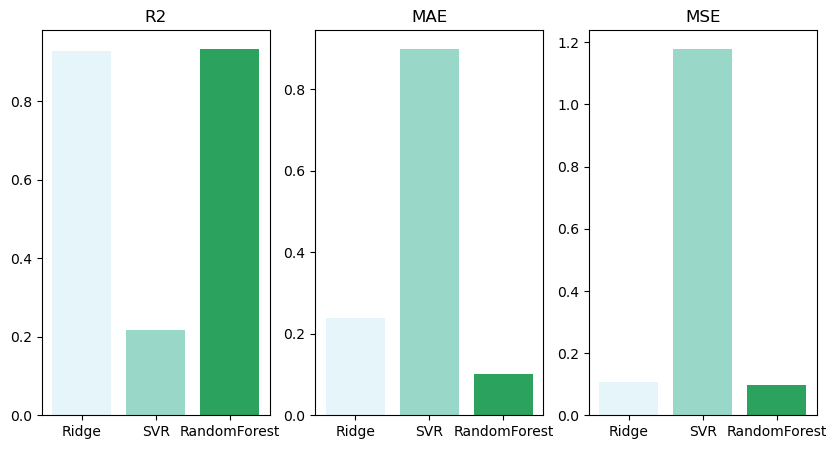

In [29]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
for i, ev in enumerate(scorer):
    values = []
    for scores in results.values():
        values.append(scores[i])
    ax[i].bar(results.keys(), values, color=["#e5f5f9", "#99d8c9", "#2ca25f"])
    ax[i].set_title(scorer[i])

In [32]:
from scipy.stats import loguniform

grid_rf = {"n_estimators": np.arange(100, 2000, 20),
          'max_features': loguniform(0.1, 0.9),  # Logarithmic distribution
          "max_depth": np.arange(10, 110, 11),
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 2, 4],
          "bootstrap": [True, False]}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

# Assuming you have 'grid_ridge' defined elsewhere as a dictionary
# containing hyperparameter distributions

rs_ridge = RandomizedSearchCV(Ridge(),
                              param_distributions=grid_ridge,
                              n_iter=19,  # Increased iterations for a more thorough search
                              cv=5,
                              random_state=42)
rs_ridge.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=19,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
                   random_state=42)

In [35]:
# The same for our RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                            param_distributions=grid_rf,
                            n_iter=20,
                            cv=5,
                            random_state=42)

# Fit the model (important step)
rs_rf.fit(X_train, y_train)  

# Now you can access best_params_
print(rs_rf.best_params_)
best_rf = RandomForestRegressor(**rs_rf.best_params_)  # Unpack best parameters
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test) 


{'bootstrap': False, 'max_depth': 54, 'max_features': 0.3883533942432021, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1860}


In [36]:
# Create dictionary for our selected models and evaluate them with our function
refined_models = {"Ridge": rs_ridge,
                 "RandomForest": rs_rf}

rs_results = models_evaluate(refined_models, X_test, y_test)

Ridge {'R2': 0.9279617379578567, 'MAE': 0.2393830243348928, 'MSE': 0.10850207369310463}
RandomForest {'R2': 0.9571655112885469, 'MAE': 0.07325574255383227, 'MSE': 0.0645161434913245}


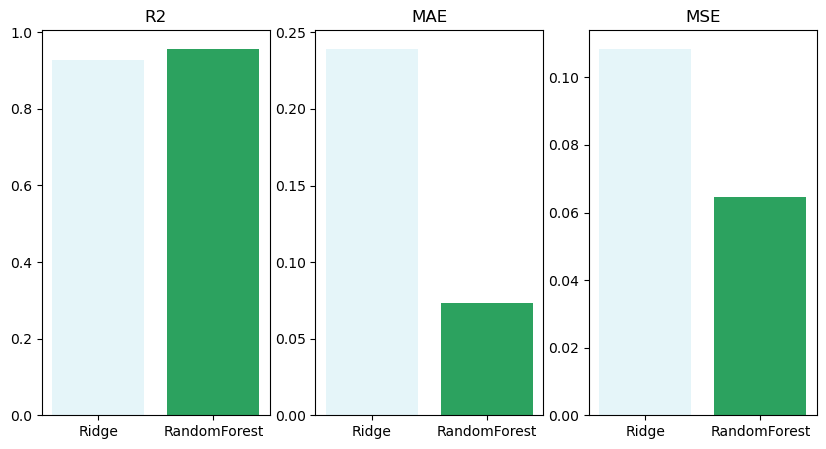

In [37]:
# Plot the results from our tuned models
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
for i, ev in enumerate(scorer):
    values = []
    for scores in rs_results.values():
        values.append(scores[i])
    ax[i].bar(rs_results.keys(), values, color=["#e5f5f9", "#2ca25f"])
    ax[i].set_title(scorer[i])

In [38]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(n_estimators=rs_rf.best_params_['n_estimators'],
                                 max_depth=rs_rf.best_params_['max_depth'],
                                 min_samples_split=rs_rf.best_params_['min_samples_split'],
                                 min_samples_leaf=rs_rf.best_params_['min_samples_leaf'])
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=54, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1860)

In [39]:
# View the best parameters
rs_rf.best_params_

{'bootstrap': False,
 'max_depth': 54,
 'max_features': 0.3883533942432021,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1860}

In [40]:
# Instantiate the ideal model
ideal_model = RandomForestRegressor(n_estimators=780,
                                    min_samples_split=2,
                                    min_samples_leaf=2,
                                    max_features="sqrt",
                                    max_depth=43,
                                    bootstrap=False)
ideal_model.fit(X_train, y_train);

In [41]:
importances = ideal_model.feature_importances_
importances

array([0.00704768, 0.09818653, 0.03402295, 0.31395859, 0.05547136,
       0.23728925, 0.0125787 , 0.14847698, 0.0463539 , 0.00391121,
       0.01767856, 0.02502429])

In [42]:
# Create a dataframe with the importances
fi = pd.DataFrame({"features": X_train.columns,
                         "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True)
fi

,features,feature_importances
0,Sleep Duration,0.313959
1,Stress Level,0.237289
2,Heart Rate,0.148477
3,Age,0.098187
4,Physical Activity Level,0.055471
5,Daily Steps,0.046354
6,Occupation,0.034023
7,Diastolic Blood Pressure,0.025024
8,Systolic Blood Pressure,0.017679
9,BMI Category,0.012579


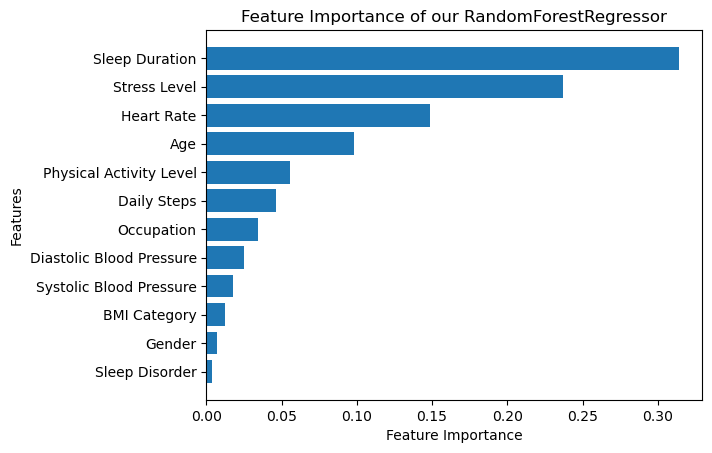

In [43]:
fig, ax = plt.subplots()
ax.barh(fi["features"], fi["feature_importances"])
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
ax.set_title("Feature Importance of our RandomForestRegressor")
ax.invert_yaxis()